## The Sparks Foundation - GRIPSEP23

## Data Science and Business Analytics Intern

### Target: From the given Dataset, What will be the predicted score if a student studies for 9.5hrs/day?

### Author: Muhammad Rauhan

## Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [4]:
seed = 0

## Loading Dataset

In [5]:
students=pd.read_csv("StudentHours.csv")

# A first look with .head()
students.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [6]:
#checking is there any missing value
students.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


## Summary Statistics

In [7]:
students.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


## Data Analysis & Visualizations

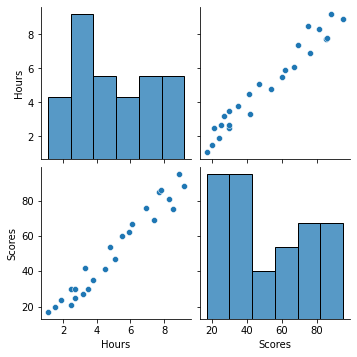

In [8]:
sns.pairplot(data=students)
plt.show()

This shows that relationships between "Hours" and "Scores" in one visualization. Also this pairwise relation exhibits a **strong correlation**.

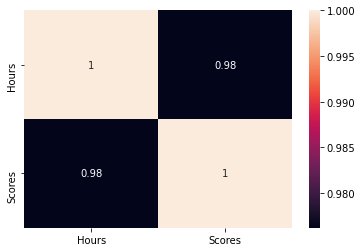

In [9]:
sns.heatmap(students.corr(), annot=True)
plt.show()

There is a **+ve correlation** between "Hours" and "Scores". Therefore, applying **linear regression model** is a best suitable approach. 

## Splitting The Data

In [10]:
x = students[['Hours']].values.reshape(-1,1)
y = students['Scores'].values

In [11]:
# splitting the data into Training set and Testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=seed)

## Calling Linear Regression Model

In [12]:
model = LinearRegression()

#train the model on the Training set
model.fit(x_train, y_train)

LinearRegression()

## Regression Plot

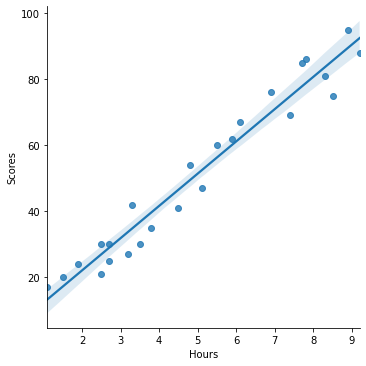

In [13]:
sns.lmplot(x='Hours', y='Scores', data=students)
plt.show()

## Prediction

**Predicting The Score Using Training Set**

In [14]:
y_train_pred=model.predict(x_train)
y_train_pred

array([39.67865467, 20.84840735, 79.32128059, 70.40168976, 12.91988217,
       52.56250809, 78.33021494, 34.72332643, 84.27660883, 93.19619966,
       62.47316457, 36.70545772, 28.77693254, 56.52677068, 28.77693254,
       86.25874013, 26.79480124, 49.58931115, 90.22300272, 46.6161142 ])

**Prediction Using Testing Set**

In [15]:
y_test_pred=model.predict(x_test)
y_test_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

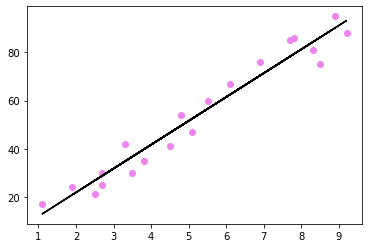

In [16]:
#plot for Training set
y_train_pred = model.predict(x_train)
plt.scatter(x_train, y_train, color = 'violet')
plt.plot(x_train, y_train_pred, color='k')
plt.show()

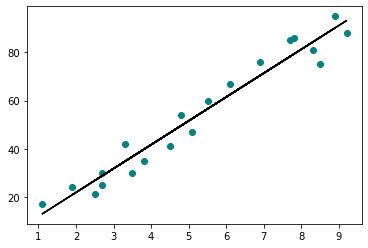

In [17]:
#plot for Testing set
y_test_pred=model.predict(x_test)
plt.scatter(x_train, y_train, color = 'teal')
plt.plot(x_train, y_train_pred, color='k')
plt.show()

## Model Evaluation

**Training Set Accuracy and Error**

In [18]:
accuracy=r2_score(y_train, y_train_pred)
print(f"Training Accuracy : {accuracy*100}%")
mae=mean_absolute_error(y_train, y_train_pred)
print(f"Training Mean Absolute Error : {mae}")
mse=mean_squared_error(y_train, y_train_pred)
print(f"Training Mean Squared Error : {mse}")
print(f"Training Root Mean Absolute Error : {np.sqrt(mse)}")

Training Accuracy : 95.15510725211553%
Training Mean Absolute Error : 5.186601709180373
Training Mean Squared Error : 30.898182377314544
Training Root Mean Absolute Error : 5.558613350226344


**Testing Set Accuracy and Error**

In [19]:
accuracy=r2_score(y_test, y_test_pred)
print(f"Testing Accuracy : {accuracy*100}%")
mae=mean_absolute_error(y_test, y_test_pred)
print(f"Testing Mean Absolute Error : {mae}")
mse=mean_squared_error(y_test, y_test_pred)
print(f"Testing Mean Squared Error : {mse}")
print(f"Testing Root Mean Absolute Error : {np.sqrt(mse)}")

Testing Accuracy : 94.54906892105353%
Testing Mean Absolute Error : 4.183859899002982
Testing Mean Squared Error : 21.598769307217456
Testing Root Mean Absolute Error : 4.647447612100373


## What will be the predicted score when a student studies 9.25 hrs/ day?

In [20]:
hours=9.25
prediction=model.predict([[hours]])
print(f"Number of Hours: {hours}\nStudent predicted score will be :{prediction[0]}")

Number of Hours: 9.25
Student predicted score will be :93.69173248737539
